# Self-Driving Car Engineer Nanodegree
# Behaviour Cloning

Project: Build a Traffic Sign Recognition Classifier
In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary.


---
## Step 0: Load The Data

IMG/center_2016_12_01_13_30_48_404.jpg
38
IMG/left_2016_12_01_13_30_48_404.jpg
36
This image is: <class 'numpy.ndarray'> with dimensions: (160, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (80, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (160, 320, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (80, 320, 3)


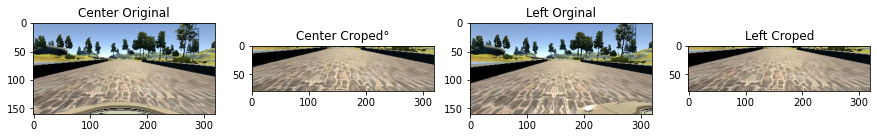

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

Image_list = os.listdir("data/IMG/")
y_data_csv  = pd.read_csv('data/driving_log.csv')

print(y_data_csv['center'][1])
print(len(y_data_csv['center'][1]))
path = y_data_csv['left'][1][1:]

print(path)
print(len(path))

center_image = mpimg.imread('data/'+y_data_csv['center'][1])
print('This image is:', type(center_image), 'with dimensions:', center_image.shape)


crop_img = center_image[60:140,0:320] 
print('This image is:', type(crop_img), 'with dimensions:', crop_img.shape)

left_image = mpimg.imread('data/'+y_data_csv['left'][1][1:])
print('This image is:', type(center_image), 'with dimensions:', center_image.shape)


left_crop_img = center_image[60:140,0:320] 
print('This image is:', type(crop_img), 'with dimensions:', crop_img.shape)

fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize=(15, 35))
ax1.imshow(center_image)
ax1.set_title('Center Original')    
ax1.axis('ON')  # clear x- and y-axes
ax2.imshow(crop_img)
ax2.set_title('Center Croped°')    
ax2.axis('ON')  # clear x- and y-axes 
ax3.imshow(left_image)
ax3.set_title('Left Orginal')    
ax3.axis('ON')  # clear x- and y-axes
ax4.imshow(left_crop_img)
ax4.set_title('Left Croped')    
ax4.axis('ON')  # clear x- and y-axes 
plt.show()

In [2]:
X_data = []
y_data = []
for row in range(len(y_data_csv)):
    X_data.append(mpimg.imread('data/'+y_data_csv['center'][row]))  
    X_data.append(mpimg.imread('data/'+y_data_csv['left'][row].strip()))   # strip() to delte space in the string
    X_data.append(mpimg.imread('data/'+y_data_csv['right'][row].strip())) 
 
    for i in range(3):
        y_data.append(y_data_csv['steering'][row])

### Crop the image

In [3]:
# Crop image, due to less net parameter
for i in range(len(X_data)):
    X_data[i] = X_data[i][60:140,0:320]   # box=(y:y+crop, x:x+crop)


## Check if the data sets coherent

In [4]:
from sklearn.utils import shuffle
#from sklearn.model_selection import train_test_split

assert(len(X_data) == len(X_data))

# Transform the data into np.arrays for the net
X_data = np.array(X_data)
y_data = np.array(y_data)

# shuffle the data
#X_data, y_data = shuffle(X_data, y_data)

# Split the Data into Training and Validation Sets
#X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


# Step 1: Dataset Summary & Exploration

Provide a Basic Summary of the Data Set
---

In [5]:
import pandas as pd

# Number of training examples
n_train = len(X_data)

# Number of training lables
n_y_train = len(y_data)

# Number of validation examples
#n_validation = X_valid.shape[0]

# Number of validation lables
#n_y_validation = y_valid.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_data[1].shape

print("Number of training samples =", n_train)
print("Number of training labels =", n_y_train)#
#print("Number of validation samples =", n_validat#ion)
#print("Number of validation labels =", n_y_validation)
print("Image data shape =", image_shape[0],image_shape[1],image_shape[2])


Number of training samples = 24108
Number of training labels = 24108
Image data shape = 80 320 3


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### Normalization of the Data

In [6]:
import cv2

# No need - Is done in the layers

#for i in range(len(X_data)):
#    X_data[i] = cv2.normalize(X_data[i],None,0,128,cv2.NORM_MINMAX) #normalizeFunction istheproble
    
#for i in range(len(X_valid)):
 #   X_valid[i] = cv2.normalize(X_valid[i],None,0,128,cv2.NORM_MINMAX) #normalizeFunction istheproble

### Model Architecture

---

#### Setup Keras

The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.
You do not need to modify this section.

In [9]:
import tensorflow as tf
#EPOCHS = 3
#BATCH_SIZE = 512

In [10]:
# Setup Keras

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"         # To use eGPU on MAC

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Lambda


Using plaidml.keras.backend backend.


#### Implement CNN architecture

In [11]:
# Build the Final Test Neural Network in Keras Here
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(80, 320, 3)))     # normalization

model.add(Conv2D(3,  (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
model.add(Conv2D(48, (3, 3),                 activation='relu'))
model.add(Conv2D(64, (3, 3),                 activation='relu'))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(50,  activation='relu'))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,                    ))


/Users/DanielD/opt/miniconda3/envs/Behaviour_Cloning/lib/python3.6/site-packages/keras/layers/core.py:665: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 80, 320, 3)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
INFO:plaidml:Opening device "metal_amd_radeon_rx_580.0"


In [17]:
# compile and fit model
#callbacks = EarlyStopping( monitor='val_loss',min_delta=0, mode='auto', restore_best_weights=True, patience=2)

model.compile( optimizer='adam', loss="mse") #metrics=[tf.keras.metrics.Accuracy()
history = model.fit(X_data,y_data, validation_split=0.2, shuffle=True, epochs=32) #commded out callbacks = [callbacks]

for key in history.history.keys():
    plt.clf()
    plt.plot(history.history[key])
    plt.title('model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.show()

Train on 19286 samples, validate on 4822 samples
Epoch 1/32
19286/19286 [==============================] - 36s 2ms/step - loss: 9.8113e-04 - val_loss: 0.0138
Epoch 2/32
19286/19286 [==============================] - 36s 2ms/step - loss: 8.9512e-04 - val_loss: 0.0135
Epoch 3/32
19286/19286 [==============================] - 36s 2ms/step - loss: 8.8704e-04 - val_loss: 0.0133
Epoch 4/32
19286/19286 [==============================] - 35s 2ms/step - loss: 0.0011 - val_loss: 0.0135
Epoch 5/32
19286/19286 [==============================] - 36s 2ms/step - loss: 8.2131e-04 - val_loss: 0.0133
Epoch 6/32
19286/19286 [==============================] - 36s 2ms/step - loss: 6.6455e-04 - val_loss: 0.0134
Epoch 7/32
19286/19286 [==============================] - 36s 2ms/step - loss: 7.1937e-04 - val_loss: 0.0137
Epoch 8/32
19286/19286 [==============================] - 37s 2ms/step - loss: 7.1950e-04 - val_loss: 0.0134
Epoch 9/32
19286/19286 [==============================] - 36s 2ms/step - loss: 7.20

TypeError: 'History' object is not subscriptable

<Figure size 432x288 with 0 Axes>

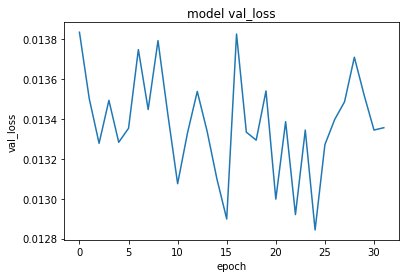

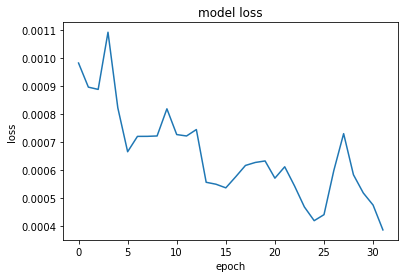

In [20]:
for key in history.history.keys():
    plt.clf()
    plt.plot(history.history[key])
    plt.title('model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.show()

In [ ]:
#save the model
model.save('model.h5')